<p align="right">
    <img src="Zewail-City.png">
</p>


---

# __Machine Learning Lab #2 Assignment__


In [1]:
# import Main Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Applying EDA

In [2]:
# Read the Data
df = pd.read_csv("Salary_Data.csv")

In [3]:
# Data head
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
# Data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [5]:
# Data statistical summary
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


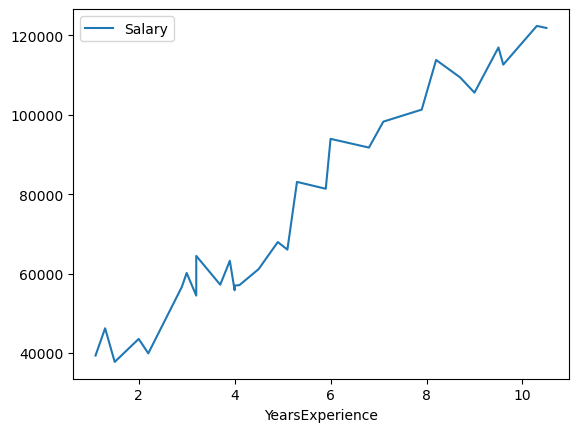

In [6]:
# Data plot
df.plot(kind = 'line', x = 'YearsExperience', y = 'Salary')
plt.show()

---

### Implementing Linear Regression model from scratch

#### Theory Build-up

minimizing the **Mean Squared Error (MSE)** loss:

$$
E = \frac{1}{n} \sum_{i=1}^{n} (y_i - (m x_i + b))^2
$$

To update parameters $m$ (slope) and $b$ (intercept), compute partial derivatives:

$$
\frac{\partial E}{\partial m} = -\frac{2}{n} \sum_{i=1}^{n} x_i (y_i - (m x_i + b))
$$
$$
\frac{\partial E}{\partial b} = -\frac{2}{n} \sum_{i=1}^{n} (y_i - (m x_i + b))
$$

Then,apply **Gradient Descent**:

$$
m := m - \alpha \cdot \frac{\partial E}{\partial m}
$$
$$
b := b - \alpha \cdot \frac{\partial E}{\partial b}
$$

Where $\alpha$ is the **learning rate**.



In [7]:
# Mean Squared Error loss.
def compute_loss(m, b, X, y):
    n = len(y)
    predictions = m * X + b
    loss = np.sum((y - predictions) ** 2) / n
    return loss

In [8]:
def gradient_descent(X, y, m, b, learning_rate, epochs):
    """
    Perform gradient descent to update m and b.
    Returns updated m, b, and history of losses.
    """
    n = len(y)
    loss_history = []

    for i in range(epochs):
        # Predictions
        y_pred = m * X + b

        # Compute gradients
        dm = (-2 / n) * np.sum(X * (y - y_pred))
        db = (-2 / n) * np.sum(y - y_pred)

        # Update parameters
        m = m - learning_rate * dm
        b = b - learning_rate * db

        # Record loss
        current_loss = compute_loss(m, b, X, y)
        loss_history.append(current_loss)

    return m, b, loss_history

In [9]:
# Data
X = df['YearsExperience'].values 
y = df['Salary'].values / 1000    # rescaled to be in k

# Initialize parameters
m = 0.0   # initial slope
b = 0.0   # initial intercept

alpha = 0.001   # Learning rate
epochs = 10000   # iretrations 

# Train the model
m_final, b_final, loss_hist = gradient_descent(X, y, m, b, alpha, epochs)

print(f"Final Parameters:")
print(f"Slope (m): {m_final:.2f}")
print(f"Intercept (b): {b_final:.2f}")

Final Parameters:
Slope (m): 9.50
Intercept (b): 25.45


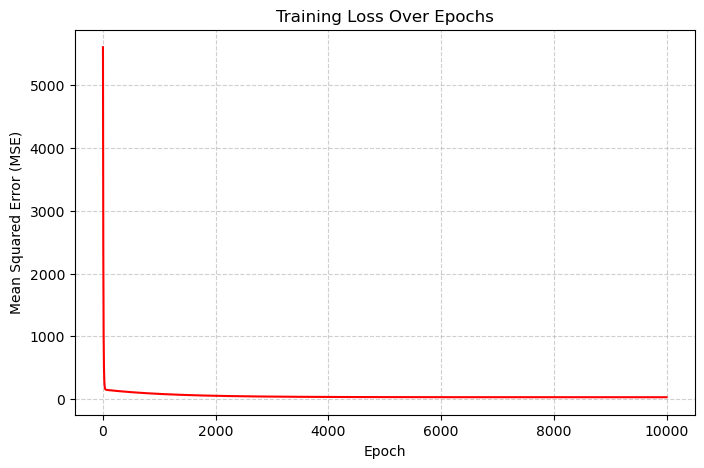

In [10]:
# Plot Training Loss Over Time

plt.figure(figsize=(8, 5))
plt.plot(loss_hist, color='red')
plt.title('Training Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error (MSE)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

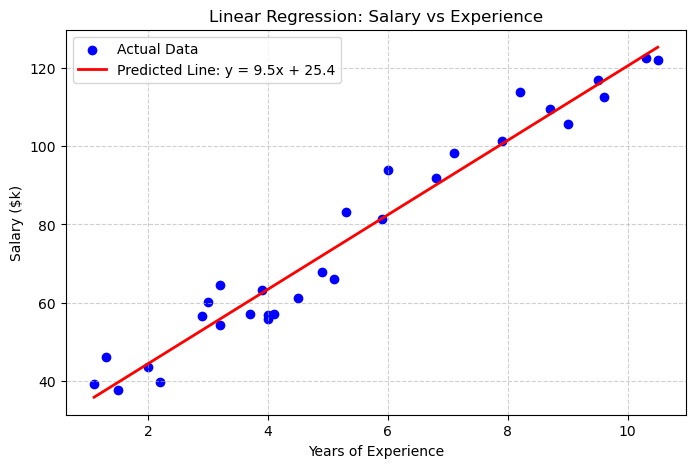

In [11]:
# Plot the Regression Line
plt.figure(figsize=(8, 5))
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, m_final * X + b_final, color='red', linewidth=2, label=f'Predicted Line: y = {m_final:.1f}x + {b_final:.1f}')
plt.title('Linear Regression: Salary vs Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary ($k)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [12]:
# Predict function
def predict_salary(years_exp, m, b):
    return m * years_exp + b

In [13]:
# Predict salary for 5 years of experience
pred = predict_salary(5, m_final, b_final)
print(f"Predicted salary for 5 years of experience: ${pred:,.2f}k")

Predicted salary for 5 years of experience: $72.95k


---